# Restaurant Popularity Analysis

## Preparation

In [77]:
import pandas as pd
import numpy as np
import math

In [103]:
restaurants_df = pd.read_csv("./../datasets/2017-2018_restaurants.csv")

In [104]:
# Remove rows where stars is NaN
restaurants_df = restaurants_df[restaurants_df['stars'].notna()]

In [105]:
print(f"There are {len(restaurants_df)} restaurants and {len(edges_df)} edges.")

There are 29963 restaurants and 494203 edges.


In [106]:
restaurants_df["popularity_value"] = restaurants_df["raw_stars"] * restaurants_df["review_count"] + restaurants_df["raw_stars"].mean() * (restaurants_df["tip_count"] + restaurants_df["checkin_count"])

In [107]:
#restaurants_df["popularity_value"] = restaurants_df["popularity_value"].apply(lambda x: math.log(x))

In [108]:
restaurants_df["popularity_value"] = round(restaurants_df["popularity_value"] / 10) * 10

In [109]:
restaurants_df = restaurants_df[["business_id", "popularity_value"]]

## Analysis

In [110]:
restaurants_df.head(3)

,business_id,popularity_value
0,6iYb2HFDywm3zjuRg0shjw,480.0
1,tCbdrRPZA0oiIYSmHG3J0w,740.0
2,D4JtQNTI4X3KcbzacDJsMw,260.0


In [111]:
restaurants_df["popularity_value"].describe()

count    29963.000000
mean       463.154891
std        855.829561
min          0.000000
25%         80.000000
50%        210.000000
75%        500.000000
max      25260.000000
Name: popularity_value, dtype: float64

In [112]:
a = restaurants_df["popularity_value"][restaurants_df["popularity_value"] > 1000]
len(a)

3294

In [113]:
b = restaurants_df["popularity_value"][restaurants_df["popularity_value"] > 3000]
len(b)

493

In [114]:
c = restaurants_df["popularity_value"][restaurants_df["popularity_value"] > 500]
len(c)

7477

In [115]:
restaurants_df = restaurants_df[restaurants_df["popularity_value"] < 2000]

In [116]:
p = restaurants_df.groupby("popularity_value").count()

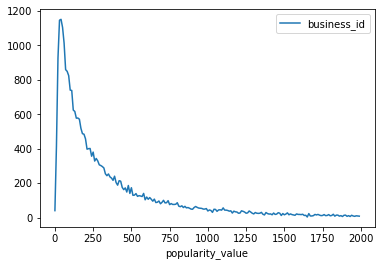

In [117]:
p.plot()